In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
ifname='input/week6.txt'


col_names=['Event','id','px','py','pz','E','eta','phi','pt']
cols=[0,1,2,3,4,5,6,7,8]
df=pd.read_csv(ifname,sep=',',index_col=None, usecols=cols, names=col_names)

In [3]:
df

,Event,id,px,py,pz,E,eta,phi,pt
0,1,211,-0.319965,-0.997853,191.867000,191.870000,5.903172,-1.881092,1.047897
1,1,-211,-0.161264,-0.459323,475.404000,475.404000,7.577194,-1.908442,0.486810
2,1,321,0.592614,0.302903,2.384160,2.524060,1.988088,0.472512,0.665539
3,1,-2212,1.406700,0.106360,7.329940,7.523200,2.350152,0.075466,1.410715
4,1,-321,-1.760640,-0.496793,1.263380,2.277390,0.644951,-2.866576,1.829387
...,...,...,...,...,...,...,...,...,...
617,1,22,0.058002,0.007821,-0.095866,0.112320,-1.268944,0.134028,0.058527
618,1,22,0.052646,0.032499,-0.108623,0.125007,-1.328714,0.553055,0.061869
619,1,22,-0.071515,0.022382,-0.300374,0.309580,-2.096751,2.838277,0.074936
620,1,-2212,0.125172,0.115001,2.461330,2.639580,3.367113,0.743075,0.169980


Text(0.5, 1.0, 'Stable Particles')

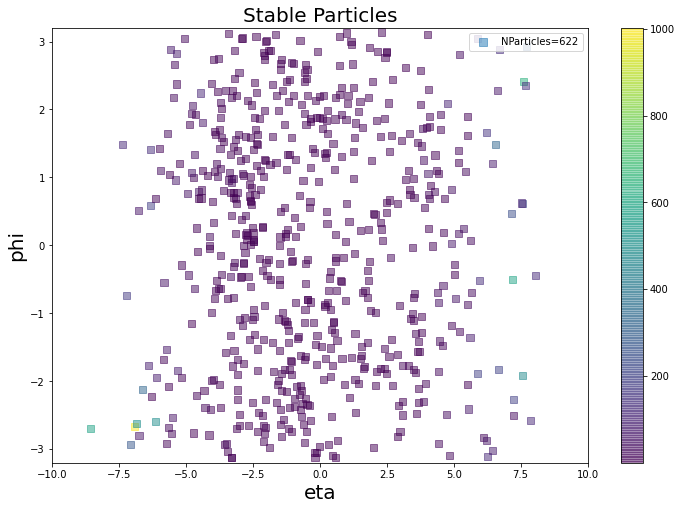

In [31]:
#scatter plot of all particles in eta-phi plane

plt.figure(figsize=(12,8))
plt.scatter(df['eta'],df['phi'],c=df['E'],cmap="viridis",alpha=0.5,marker='s',s=50)
plt.xlim(-10,10)
plt.ylim(-3.2,3.2)
plt.xlabel('eta',fontsize=20)
plt.ylabel('phi',fontsize=20)
plt.legend([f'NParticles={df.shape[0]}'],loc='upper right',)
plt.colorbar()
plt.title(f'Stable Particles',fontsize=20)


In [5]:

df_etaphi = df[['eta', 'phi']]
df_etaphi.head()

,eta,phi
0,5.903172,-1.881092
1,7.577194,-1.908442
2,1.988088,0.472512
3,2.350152,0.075466
4,0.644951,-2.866576


# KMeans Model

In [6]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_etaphi)

KMeans(n_clusters=3)

In [7]:
# inertia on the fitted data
kmeans.inertia_

2959.490498674099

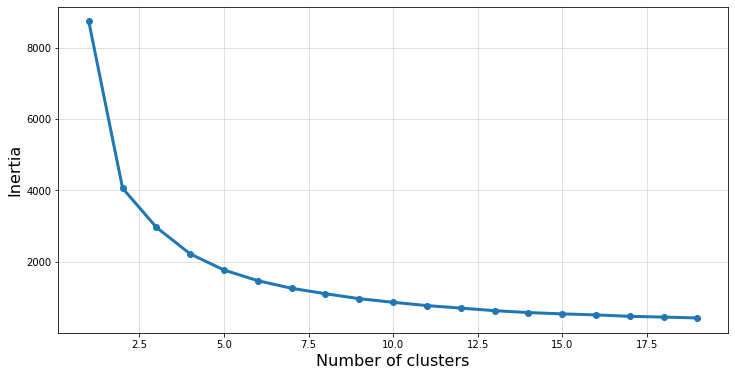

In [8]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_etaphi)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o',lw=3)
plt.xlabel('Number of clusters',fontsize=16)
plt.ylabel('Inertia',fontsize=16)
plt.grid('--',alpha=0.5)
plt.show()

In [26]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_etaphi)
pred = kmeans.predict(df_etaphi)

In [27]:
df_new = pd.DataFrame(df_etaphi)
df_new['cluster'] = pred
df_new['cluster'].value_counts()

1    245
2    222
0    155
Name: cluster, dtype: int64

In [28]:
clusters=np.unique(pred) #no of unique clusters

centers=kmeans.cluster_centers_

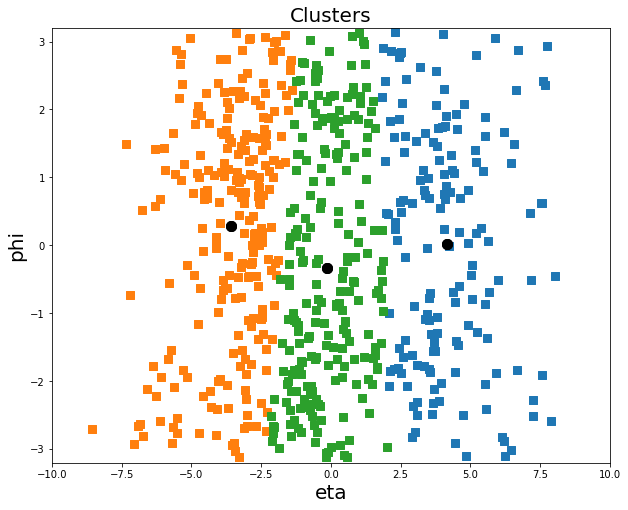

In [30]:
plt.figure(figsize=(10,8))
for cluster in clusters:
    plt.scatter(df_new[df_new['cluster']==cluster]['eta'],df_new[df_new['cluster']==cluster]['phi'],alpha=1.0,marker="s",s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9);
    plt.xlim(-10,10)
    plt.ylim(-3.2,3.2)
    plt.xlabel('eta',fontsize=20)
    plt.ylabel('phi',fontsize=20)
    plt.title(f'Clusters',fontsize=20)


## Bringing Energy also into clustering

- so now clustering happens in 3D space by eta phi and E

In [13]:
# Putting Energy into dataframe

df_etaphiE= df[['eta', 'phi','E']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_etaphiE)

In [14]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)
cluster = kmeans.predict(data_scaled)

In [15]:
df_en = pd.DataFrame(df_etaphiE)

#df_en.head()
df_en['cluster'] = cluster
clusters=np.unique(cluster) #no of unique clusters
centers=kmeans.cluster_centers_

df_en['cluster'].value_counts()

1    322
2    289
0     11
Name: cluster, dtype: int64

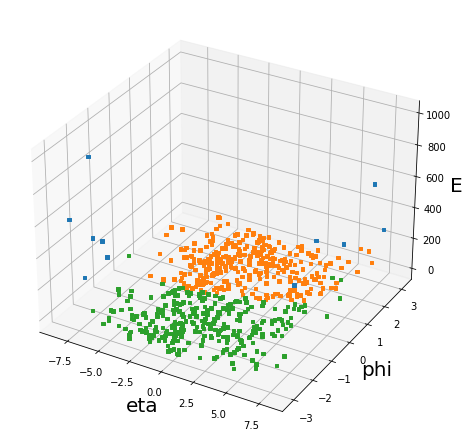

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
for cluster in clusters:
    ax.scatter(df_en[df_en['cluster']==cluster]['eta'],df_en[df_en['cluster']==cluster]['phi'],df_en[df_en['cluster']==cluster]['E'],alpha=1.0,marker="s",s=12)
    #ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9);
    
    ax.set_xlabel('eta',fontsize=20)
    ax.set_ylabel('phi',fontsize=20)
    ax.set_zlabel('E',fontsize=20)
    #ax.title(f'Clusters',fontsize=20)


# Applying DBSCAN algorithm

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
model = DBSCAN(eps=0.40, min_samples=10)

# Find the clusters in the smaller dataframe
yhat = model.fit_predict(df_etaphi)

clusters = np.unique(yhat)

In [35]:
clusters

array([-1,  0,  1,  2,  3,  4,  5])

In [38]:
df_etaphi=df_etaphi.drop(['cluster'],axis=1)

df_etaphi['cluster']=yhat

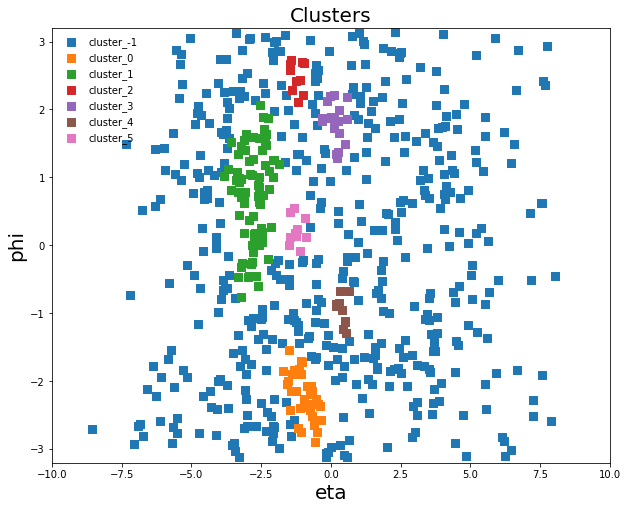

In [40]:
plt.figure(figsize=(10,8))
for cluster in clusters:
    plt.scatter(df_etaphi[df_etaphi['cluster']==cluster]['eta'],df_etaphi[df_etaphi['cluster']==cluster]['phi'],alpha=1.0,marker="s",s=50,label=f'cluster_{cluster}')
    plt.xlim(-10,10)
    plt.ylim(-3.2,3.2)
    plt.legend(frameon=False)
    plt.xlabel('eta',fontsize=20)
    plt.ylabel('phi',fontsize=20)
    plt.title(f'Clusters',fontsize=20)


# Much better visibly!

### Choosing optimal value of epsilon

In [22]:
from sklearn.neighbors import NearestNeighbors

In [23]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_etaphi.drop('cluster',axis=1))
distances, indices = nbrs.kneighbors(df_etaphi.drop('cluster',axis=1))

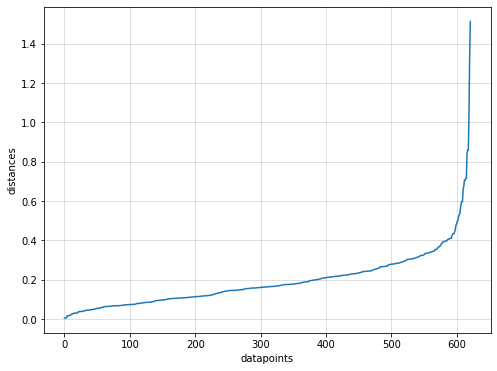

In [24]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(8,6))
plt.plot(distances)
plt.xlabel('datapoints')
plt.ylabel('distances')
plt.grid('-',alpha=0.5)
plt.show()


## Point of maximum curvature (or elbow gives best epsilon value)